### Job Submission

Example of SLURM job submission script is in ``scripts/job.pbs``:

~~~bash
#!/bin/bash -l
#SBATCH -p debug 
#SBATCH -n 512
#SBATCH -o %j.out
#SBATCH -e %j.err
#SBATCH --qos=normal
#SBATCH -t 00:30:00
#SBATCH -J flash
#SBATCH -L SCRATCH
cd /global/project/projectdirs/astro250/dlee/FLASH4.3/object
srun -n 512 ./flash4
~~~

To submit this, run: 

    sbatch job.pbs

# Setup


In [ ]:
./setup Sphere -3d -auto ; cd object/;make -j8;cd ..;

In [10]:
def plot_dens(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sphere_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    if particle : 
        data =np.loadtxt("sinks_evol.dat_cleaned",skiprows=1)
        pcl_indx_at_t = np.where(np.isclose(int(ds.current_time.in_cgs()),data[:,1]))[0]
        print "Number of sink particles: " , len(pcl_indx_at_t)
        pcl_pos_at_t = data[pcl_indx_at_t,2:5]
        for pos in pcl_pos_at_t:
            slc.annotate_marker(pos, coord_system='data',marker='.',plot_args={'color':'black','s':3})
    slc.show()

In [1]:
%pylab inline
import yt
yt.mylog.setLevel(50)

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/dlee/FLASH4.3/object/

/global/u2/d/dorislee/dlee/FLASH4.3/object



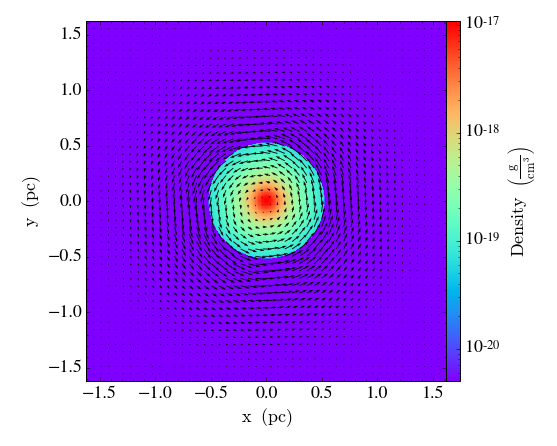

In [11]:
plot_dens(0,velocity=True)

## Boundary Conditions
The boundary conditions for our problem is outflow in the x and y direction, but periodic in the z direction. The periodic BC in the z direction is motivated by the fact that observationally dense cores tend to reside in strands of high-density gas

# Simulation small values 

tiny,smalle,smlrho ... are specified inside Config

# Timestepping

There are two types of timesteps in FLASH and should not be confused as each 